## sklearn.linear_model.LinearRegression
* _class_ sklearn.linear_model.LinearRegression(_*_,  _fit_intercept=True_,  _copy_X=True_,  _n_jobs=None_,  _positive=False_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/linear_model/_base.py#L502)[](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression "Permalink to this definition")

## sklearn.linear_model.SGDRegressor

* _class_ sklearn.linear_model.SGDRegressor(_loss='squared_error'_,  _*_,  _penalty='l2'_,  _alpha=0.0001_,  _l1_ratio=0.15_,  _fit_intercept=True_,  _max_iter=1000_,  _tol=0.001_,  _shuffle=True_,  _verbose=0_,  _epsilon=0.1_,  _random_state=None_,  _learning_rate='invscaling'_,  _eta0=0.01_,  _power_t=0.25_,  _early_stopping=False_,  _validation_fraction=0.1_,  _n_iter_no_change=5_,  _warm_start=False_,  _average=False_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/linear_model/_stochastic_gradient.py#L1718)[](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor "Permalink to this definition")

* 이것도 liner regressor.  확률적 경사하강법 사용하고 싶을 때 이용한다.
* eta 값이 커질 수록 lerning rate 커진다

In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]

# 학습 
reg.fit(X, y)

print(reg.predict([[165]]))

[67.30998637]


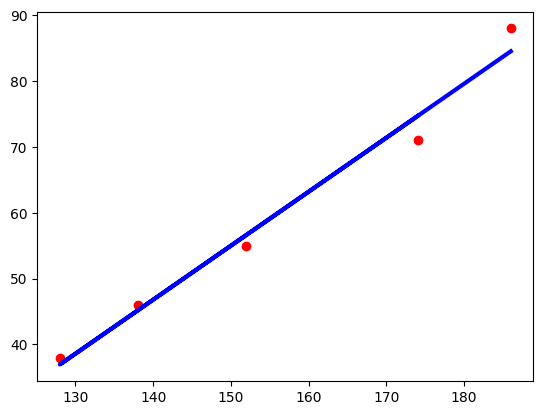

In [3]:
# 학습 데이터와 y값을 산포도로 그린다
plt.scatter(X, y, color = 'r')

# 학습 데이터를 입력으로 하여 예측값을 계산한다
y_pred = reg.predict(X)

# 학습 데이터와 예측값으로 선그래프로 그린다
# 계산된 기울기와 y절편을 가지는 직선이 그려진다
plt.plot(X, y_pred, color = 'b', linewidth = 3)
plt.show()

In [4]:
reg.coef_

array([0.82021132])

# Diabetes 예제

In [11]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [12]:
diabetes.data.shape

(442, 10)

In [13]:
diabetes.target.shape

(442,)

### Multi-collinearity

1. 유무 먼저 확인 
    - VIF <- statsmodels 라이브러리 

2. 비교 
    - Just 'Linear Regression'
    - corr() 확인하여, 제거 후 'Linear Regression'
    - standard scaling 후 'Heatmap'

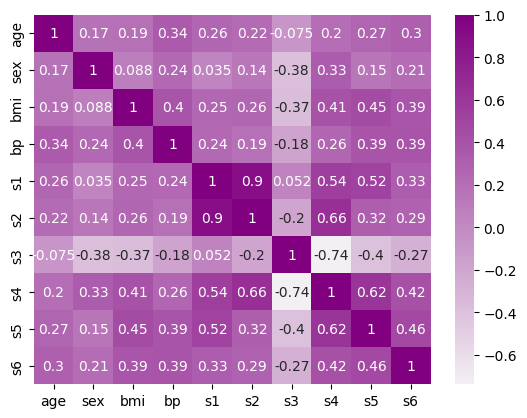

In [34]:
# regression 사전에 다중 공선성 확인
# corr -> heatmap 확인

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diabetes=load_diabetes()
X_train, X_test, y_train, y_test= train_test_split(diabetes.data,diabetes.target,test_size=0.2, random_state=0)

model=LinearRegression()

model.fit(X_train,y_train)
df_diabetes=pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_diabetes.corr()

cmap = sns.light_palette("purple", as_cmap=True)
sns.heatmap(df_diabetes.corr(), annot=True, cmap=cmap)
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# 그냥 해보기

# model=LinearRegression()
# model.fit(X_train,y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f} RMSE : {rmse:.3f}')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 3424.259 RMSE : 58.517
Variance score : 0.332


In [43]:
# s1, 제거
df_diabetes_drop_s1 = df_diabetes.drop('s1', axis=1)
X_train, X_test, y_train, y_test= train_test_split(df_diabetes_drop_s1,diabetes.target,test_size=0.2, random_state=0)


In [ ]:
# df_diabetes_drop_s1.corr()

# cmap = sns.light_palette("purple", as_cmap=True)
# sns.heatmap(df_diabetes_drop_s1.corr(), annot=True, cmap=cmap)
# plt.show()

In [45]:
model=LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f} RMSE : {rmse:.3f}')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_pred)))

# s1 뺀 것이 오히려 안좋은 결과

MSE : 3468.959 RMSE : 58.898
Variance score : 0.324


In [49]:
# 그럼 이번에는 s2 빼보자
df_diabetes_drop_s2 = df_diabetes.drop('s2', axis=1)
X_train, X_test, y_train, y_test= train_test_split(df_diabetes_drop_s2,diabetes.target,test_size=0.2, random_state=0)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f} RMSE : {rmse:.3f}')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_pred)))

# 더 안좋다..

MSE : 3457.318 RMSE : 58.799
Variance score : 0.326


In [50]:
# 그럼 이번에는 s4 빼보자
df_diabetes_drop_s4 = df_diabetes.drop('s4', axis=1)
X_train, X_test, y_train, y_test= train_test_split(df_diabetes_drop_s4,diabetes.target,test_size=0.2, random_state=0)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f} RMSE : {rmse:.3f}')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 3438.420 RMSE : 58.638
Variance score : 0.329


In [46]:
## StandardScaler해서 한 거
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df_diabetes)
df_diabete =scaler.transform(df_diabetes)

y_target=diabetes.target
X_data=df_diabete
X_train,X_test,y_train,y_test= train_test_split(X_data,y_target,test_size=0.3, random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 2993.705, RMSE:54.715
Variance score:0.497
